***Veri Ön İşleme Adımları***

**1)Eksik Verilerin Kontrolü ve Temizlenmesi:** Eksik verileri kontrol edip gerekirse uygun yöntemlerle doldurmak.
**2)Aykırı Değerlerin Analizi:** Aykırı değerlerin olup olmadığını kontrol etmek ve gerekirse bu değerleri ele almak.
**3)Özellik Seçimi ve Dönüşümleri:** Gerekirse özellikleri seçmek veya dönüştürmek.
**4)Ölçeklendirme:** Özelliklerin ölçeklendirilmesi.
Bu adımları izleyerek veri ön işleme yapalım ve ardından modelleri uygulayalım. 

Veri setini incelediğimizde, her biri farklı özelliklere sahip 755 sütun ve bir class sütunu ile sınıflandırma etiketi olduğunu görüyoruz. Şimdi veri ön işleme adımlarını uygulayalım:

**1)Eksik Verilerin Kontrolü ve Temizlenmesi:** Veri setinde eksik değer olup olmadığını kontrol edelim.
**2)Aykırı Değerlerin Analizi:** Temel istatistiksel analizlerle aykırı değerleri kontrol edelim.
**3)Özellik Seçimi ve Dönüşümleri:** 'id' ve 'class' dışında kalan sütunları özellikler olarak belirleyelim.
**4)Ölçeklendirme:** Standartlaştırma işlemi uygulayalım.

In [45]:
import pandas as pd

# Veri setini yükleme
file_path = 'C:\\Yeni klasör\\Parkison_Dataset.csv'
data = pd.read_csv(file_path)

# Veri setinin ilk 5 satırını görüntüleme
data.head()


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


Veri setinde eksik değer bulunmuyor. Şimdi, aykırı değerleri kontrol etmek için temel istatistikleri ve bazı grafik analizlerini gözden geçirelim. Özellikle, önemli özelliklerin dağılımını görmek için bir göz atabiliriz. Ancak, veri setindeki özellik sayısı fazla olduğu için tüm özellikleri analiz etmek mümkün olmayabilir. Bu nedenle, birkaç önemli özellik üzerinde odaklanabiliriz.

In [49]:
# Eksik değerlerin kontrol edilmesi
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

Veri seti üzerindeki temel istatistikler, bazı sütunlarda geniş bir değer aralığı olduğunu gösteriyor. Bu, aykırı değerlerin varlığına işaret edebilir. Özellikle, minimum ve maksimum değerlerin büyük farklar göstermesi aykırı değerlere işaret edebilir.

Aykırı Değerlerin Analizi: Aykırı değerleri belirlemek için, özelliklerin dağılımlarını görselleştirebiliriz. Ancak, özellik sayısı çok fazla olduğu için tüm özellikleri görselleştirmek pratik olmayabilir. Bunun yerine, örnek olarak birkaç önemli özellik üzerinde yoğunlaşabiliriz.

Şimdi, veri setindeki id ve class sütunlarını ayırıp kalan özellikleri ölçeklendirelim ve ardından makine öğrenimi algoritmalarını uygulayalım

In [55]:
# Temel istatistiksel özet
data.describe()


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Özelliklerin ve hedef değişkenin ayrılması
X = data.drop(columns=['id', 'class'])
y = data['class']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5], X_test[:5]


(array([[-1.04055688,  0.47126094,  0.56016794, ..., -0.73448598,
         -0.39539864, -0.61971077],
        [ 0.96102387,  0.41159886,  0.32989777, ..., -0.4423655 ,
         -0.61720284, -0.83269257],
        [-1.04055688,  0.51431667,  0.66609222, ...,  1.08284854,
          1.91358583,  1.78676432],
        [ 0.96102387,  0.14263642,  0.79043811, ...,  0.49790921,
          0.61794832,  1.36832658],
        [-1.04055688,  0.71045273,  0.9589671 , ..., -0.61739527,
         -0.70568864,  0.58679424]]),
 array([[-1.04055688,  0.13049869,  1.25875008, ..., -0.68330204,
         -0.80434971, -0.83448388],
        [ 0.96102387,  0.12023295,  1.72173705, ..., -0.66740468,
         -0.59548443,  0.51909367],
        [ 0.96102387, -1.08816564,  1.1757089 , ..., -0.73520974,
         -0.79160619, -0.6770006 ],
        [-1.04055688,  0.45423188,  0.55009362, ..., -0.5899304 ,
         -0.53430717, -0.76218042],
        [-1.04055688,  0.35797546,  0.12769177, ..., -0.72798482,
         -0.83

Veri ön işleme adımlarını tamamladıktan sonra artık algoritmalarımızı yazmaya başlayabiliriz.

***Gerekli Kütüphanelerin İmport Edilmesi***

Bu bölüm, veri işleme, model oluşturma ve değerlendirme için gerekli olan kütüphaneleri içe aktarır. pandas veri manipülasyonu için, scikit-learn ise makine öğrenimi algoritmaları ve veri ön işleme için kullanılır.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


***Veri Setinin Yüklenmesi***

Bu bölümde, Parkinson veri seti belirtilen dosya yolundan okunur ve bir pandas DataFrame'ine yüklenir.

In [11]:
file_path = 'C:\\Yeni klasör\\Parkison_Dataset.csv'
data = pd.read_csv(file_path)


***Özelliklerin ve Hedef Değişkenin Ayrılması***

Veri setinden 'id' ve 'class' sütunları ayrılır. 'id' sütunu çıkarılırken, 'class' hedef değişken olarak belirlenir.

In [15]:
X = data.drop(columns=['id', 'class'])
y = data['class']


***Veri Setinin Eğitim ve Test Olarak Bölünmesi***

Veri seti %80 eğitim, %20 test olmak üzere ikiye bölünür. random_state parametresi, sonuçların tekrarlanabilirliğini sağlar.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***Verilerin Ölçeklendirilmesi***

Özellikler, StandardScaler kullanılarak standartlaştırılır. Bu, model performansını artırmak için önemlidir.

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


***Farklı Modellerin Tanımlanması***

Çeşitli makine öğrenimi modelleri bir sözlükte tanımlanır. Her bir modelin adı, modeli oluşturmak için kullanılır.

In [27]:
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC()
}


***Modellerin Eğitilmesi ve Değerlendirilmesi***

Bu döngü, her bir modeli eğitim verileri üzerinde eğitir ve test verileri üzerinde tahminler yapar. Sonuçlar classification_report ile değerlendirilir ve bir sözlükte saklanır.

In [31]:
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = classification_report(y_test, y_pred, output_dict=True)


***Oylama Sınıflandırıcısı (Voting Classifier)***

Bu bölümde, bir oylama sınıflandırıcısı oluşturulur ve farklı modeller birleştirilir. 'Hard' oylama yöntemi, her modelin tahminlerinin çoğunluğuna göre karar verir. Sonuçlar yine classification_report ile değerlendirilir ve sonuçlar sözlüğüne eklenir.

In [35]:
voting_clf = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier()),
    ('gnb', GaussianNB()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC())
], voting='hard')

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

voting_results = classification_report(y_test, y_pred_voting, output_dict=True)
results["Voting Classifier"] = voting_results


***Sonuçların Görüntülenmesi***

Tüm modellerin sonuçları bir sözlükte saklanır ve çıktı olarak verilir.

In [38]:
results


{'KNN': {'0': {'precision': 1.0,
   'recall': 0.5789473684210527,
   'f1-score': 0.7333333333333334,
   'support': 38},
  '1': {'precision': 0.8769230769230769,
   'recall': 1.0,
   'f1-score': 0.9344262295081968,
   'support': 114},
  'accuracy': 0.8947368421052632,
  'macro avg': {'precision': 0.9384615384615385,
   'recall': 0.7894736842105263,
   'f1-score': 0.833879781420765,
   'support': 152},
  'weighted avg': {'precision': 0.9076923076923077,
   'recall': 0.8947368421052632,
   'f1-score': 0.8841530054644808,
   'support': 152}},
 'Logistic Regression': {'0': {'precision': 0.7575757575757576,
   'recall': 0.6578947368421053,
   'f1-score': 0.704225352112676,
   'support': 38},
  '1': {'precision': 0.8907563025210085,
   'recall': 0.9298245614035088,
   'f1-score': 0.9098712446351931,
   'support': 114},
  'accuracy': 0.8618421052631579,
  'macro avg': {'precision': 0.8241660300483831,
   'recall': 0.793859649122807,
   'f1-score': 0.8070482983739345,
   'support': 152},
  'wei

***Gerekli Kütüphanelerin İmport Edilmesi***

Bu satır, veri işleme ve analiz işlemleri için gerekli olan pandas kütüphanesini içe aktarır.

In [66]:
import pandas as pd


***Modellerin Doğruluk Sonuçları***

Bu sözlük, çeşitli makine öğrenimi modellerinin doğruluk değerlerini içerir. Her bir modelin adı ve karşılık gelen doğruluk değeri belirtilmiştir.

In [72]:
accuracy_results = {
    "KNN": 0.89,
    "Logistic Regression": 0.86,
    "Random Forest": 0.85,
    "GaussianNB": 0.80,
    "Decision Tree": 0.78,
    "SVC": 0.86,
    "Voting Classifier": 0.88
}


***Doğruluk Sonuçlarının DataFrame'e Dönüştürülmesi***

Bu satır, doğruluk sonuçlarını "Model" ve "Accuracy" sütunlarına sahip bir pandas DataFrame'e dönüştürür. Bu yapı, verilerin daha kolay işlenmesi ve görselleştirilmesi için kullanılır.

In [76]:
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])


***Doğruluk Sonuçlarının Görüntülenmesi***

Oluşturulan DataFrame, ekrana yazdırılarak her modelin doğruluk değerleri görüntülenir.

In [80]:
print(accuracy_df)


                 Model  Accuracy
0                  KNN      0.89
1  Logistic Regression      0.86
2        Random Forest      0.85
3           GaussianNB      0.80
4        Decision Tree      0.78
5                  SVC      0.86
6    Voting Classifier      0.88


***Gerekli Kütüphanelerin İmport Edilmesi***

Bu satırlar, veri işleme için pandas ve veri görselleştirme için matplotlib.pyplot kütüphanelerini içe aktarır. Pandas, veri manipülasyonu ve analizi için güçlü araçlar sunarken, matplotlib veri görselleştirme için kullanılır.

In [84]:
import pandas as pd
import matplotlib.pyplot as plt


***Modellerin Doğruluk Sonuçları***

Bu sözlük, çeşitli makine öğrenimi modellerinin doğruluk değerlerini içerir. Her bir modelin adı ve karşılık gelen doğruluk değeri belirtilmiştir.

In [90]:
accuracy_results = {
    "KNN": 0.89,
    "Logistic Regression": 0.86,
    "Random Forest": 0.85,
    "GaussianNB": 0.80,
    "Decision Tree": 0.78,
    "SVC": 0.86,
    "Voting Classifier": 0.88
}


***Doğruluk Sonuçlarının DataFrame'e Dönüştürülmesi***

Bu satır, doğruluk sonuçlarını "Model" ve "Accuracy" sütunlarına sahip bir pandas DataFrame'e dönüştürür. Bu yapı, verilerin daha kolay işlenmesi ve görselleştirilmesi için kullanılır.

In [94]:
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])


***Doğruluk Sonuçlarının Görselleştirilmesi***

Bu bölüm, doğruluk oranlarını bir bar grafiği ile görselleştirir:

Figure Ayarları: plt.figure(figsize=(10, 6)) satırı, grafik boyutunu belirler.
Bar Grafiği: plt.bar() fonksiyonu, modellerin doğruluk oranlarını gösteren barlar çizer. color='skyblue' barların rengini belirler.
Eksen Etiketleri ve Başlık: plt.xlabel(), plt.ylabel(), ve plt.title() fonksiyonları sırasıyla x ekseni, y ekseni etiketlerini ve grafiğin başlığını ayarlar.
X Eksenindeki Etiketlerin Döndürülmesi: plt.xticks(rotation=45, ha='right') x eksenindeki model isimlerini 45 derece döndürür ve sağa hizalar, bu da okunabilirliği artırır.
Y Ekseninin Sınırları ve Izgara Çizgileri: plt.ylim(0, 1) y eksenini 0 ile 1 arasında sınırlar. plt.grid(axis='y', linestyle='--', alpha=0.7) y eksenine yatay ızgara çizgileri ekler, bu da verilerin daha iyi anlaşılmasına yardımcı olur.
Grafiği Gösterme: plt.show() fonksiyonu, grafiği ekranda görüntüler.

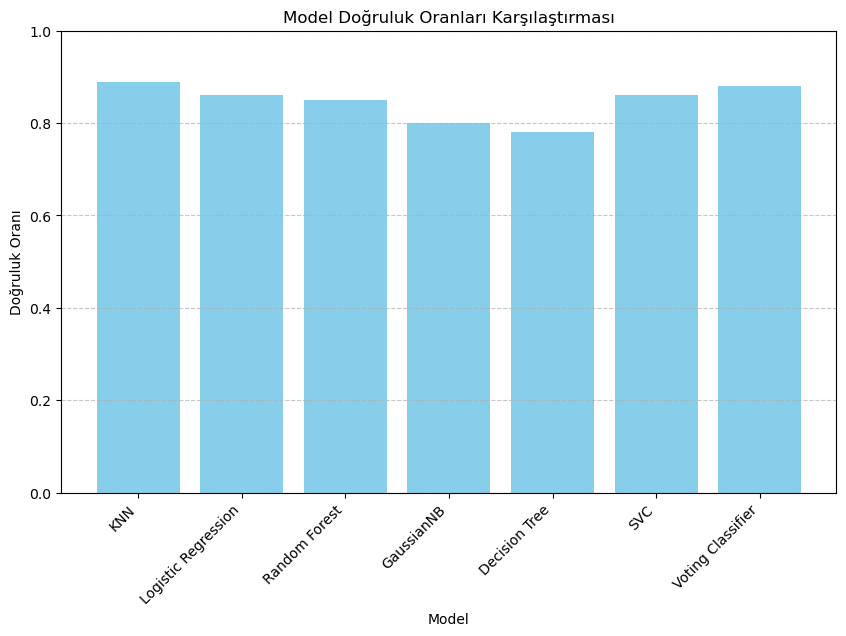

In [99]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Doğruluk Oranı')
plt.title('Model Doğruluk Oranları Karşılaştırması')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


***Gerekli Kütüphanelerin İmport Edilmesi***

Bu satırlar, veri işleme için pandas ve veri görselleştirme için matplotlib.pyplot kütüphanelerini içe aktarır. Pandas, veri manipülasyonu ve analizi için kullanılırken, matplotlib veri görselleştirme sağlar.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt


***Modellerin Doğruluk Sonuçları***

In [106]:
accuracy_results = {
    "KNN": 0.89,
    "Logistic Regression": 0.86,
    "Random Forest": 0.85,
    "GaussianNB": 0.80,
    "Decision Tree": 0.78,
    "SVC": 0.86,
    "Voting Classifier": 0.88
}


***Doğruluk Sonuçlarının DataFrame'e Dönüştürülmesi***

In [109]:
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])


***Doğruluk Sonuçlarının Çizgi Grafiği ile Görselleştirilmesi***

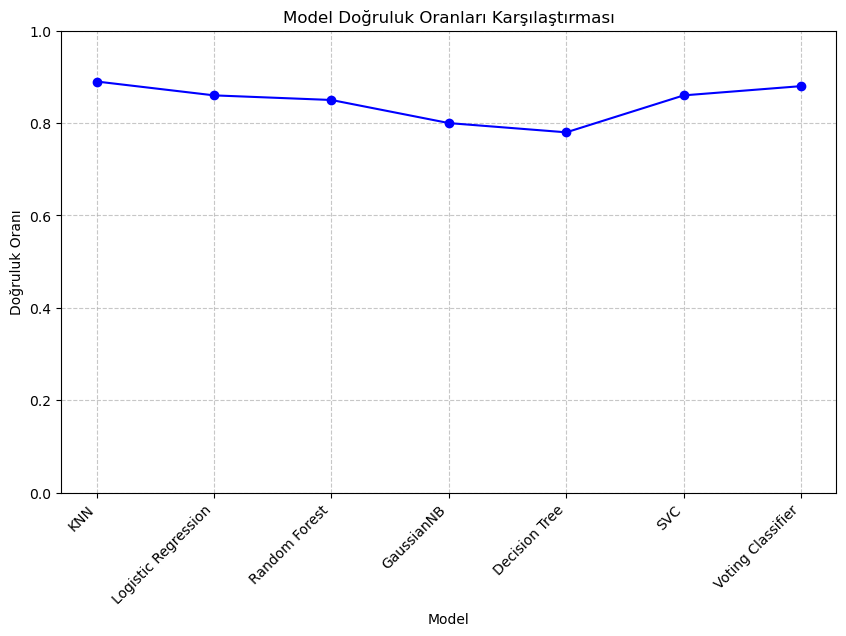

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(accuracy_df['Model'], accuracy_df['Accuracy'], marker='o', linestyle='-', color='b')
plt.xlabel('Model')
plt.ylabel('Doğruluk Oranı')
plt.title('Model Doğruluk Oranları Karşılaştırması')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Figure Ayarları: plt.figure(figsize=(10, 6)) satırı, grafiğin boyutunu belirler.
Çizgi Grafiği: plt.plot() fonksiyonu, modellerin doğruluk oranlarını gösteren bir çizgi grafiği çizer. marker='o' her veri noktası için bir işaretleyici (marker) ekler, linestyle='-' çizgi stilini belirtir ve color='b' çizginin rengini mavi yapar.
Eksen Etiketleri ve Başlık: plt.xlabel(), plt.ylabel(), ve plt.title() fonksiyonları sırasıyla x ekseni, y ekseni etiketlerini ve grafiğin başlığını ayarlar.
X Eksenindeki Etiketlerin Döndürülmesi: plt.xticks(rotation=45, ha='right') x eksenindeki model isimlerini 45 derece döndürür ve sağa hizalar, bu da okunabilirliği artırır.
Y Ekseninin Sınırları ve Izgara Çizgileri: plt.ylim(0, 1) y eksenini 0 ile 1 arasında sınırlar. plt.grid(True, linestyle='--', alpha=0.7) grafik üzerinde yatay ve dikey ızgara çizgileri ekler, bu da verilerin daha iyi anlaşılmasına yardımcı olur.
Grafiği Gösterme: plt.show() fonksiyonu, grafiği ekranda görüntüler.